# Data Augmentation
## using audiomentation library
https://github.com/iver56/audiomentations

This notebook is for augmentation of siren and car-horn audio data. The number of the two dataset are smaller than other audio dataset, e.g. noise, children-playing in Urban Sound 8k.

In [1]:
! pip install audiomentations --quiet

In [2]:
! pip install seaborn --quiet

In [3]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift,\
                            ApplyImpulseResponse, AddShortNoises, AirAbsorption, \
                            SpecCompose, SpecChannelShuffle, SpecFrequencyMask
import librosa
from librosa import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

import scipy
from scipy.io import wavfile
from IPython.display import Audio

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
# It is just for plotting better
# https://seaborn.pydata.org/generated/seaborn.set_context.html
sns.set_context("notebook")

In [5]:
# SEED fixed as 42
def seed_set(seed=42):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    
seed_set()

## Pick up car-horn audio file

In [6]:
# check current directory
!pwd

/Users/shige/code/shigeru-github/tmp_hasp/hasp/notebooks


In [7]:
# define directries
base_dir = "/Users/shige/code/LeWagon_Project_Test/"
us8kdata_dir = os.path.join(base_dir, "UrbanSound8k")
meta_file = os.path.join(us8kdata_dir, "metadata/UrbanSound8K.csv")
audio_dir = os.path.join(us8kdata_dir, "audio/")

In [8]:
# load metadata
df = pd.read_csv(meta_file)
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [9]:
car_horn_file1 = os.path.join(audio_dir, "fold7/99812-1-6-0.wav")
car_horn_file1

'/Users/shige/code/LeWagon_Project_Test/UrbanSound8k/audio/fold7/99812-1-6-0.wav'

In [10]:
Audio(data=car_horn_file1)

## Load car-horn audio data

In [11]:
# Load audio data
y, sr = librosa.load(car_horn_file1)
y, sr

(array([0.01375774, 0.02539142, 0.02333459, ..., 0.00703834, 0.00402449,
        0.        ], dtype=float32),
 22050)

In [12]:
Audio(data=y, rate=sr)

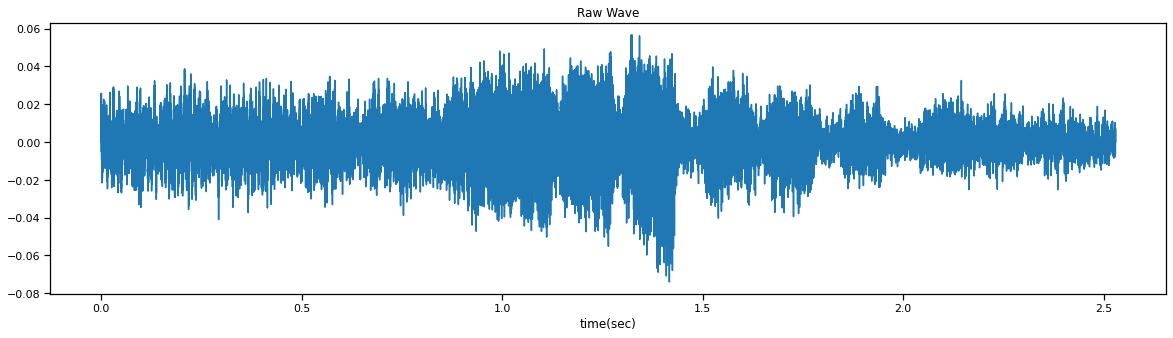

In [13]:
# Display audio file
plt.figure(figsize=(20, 5))
x_data = np.arange(0, len(y)) / sr
plt.plot(x_data, y)
plt.xlabel("time(sec)")
plt.title("Raw Wave")
plt.show()

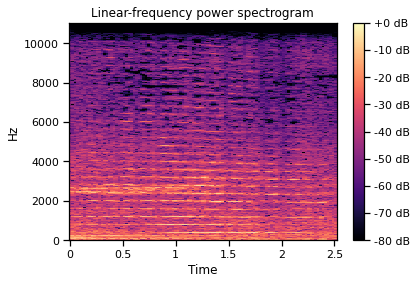

In [14]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
ax.set(title='Linear-frequency power spectrogram')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB");

## Augumentation - Test
(again see https://github.com/iver56/audiomentations)

In [15]:
# Data Augmentation
augment = Compose([
    AddGaussianNoise(min_amplitude=0.02, max_amplitude=0.02, p=1.0),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=1.0),
])

In [16]:
# Apply Data Augmentation function
augmented_data = augment(samples=y, sample_rate=sr)

In [17]:
Audio(data=augmented_data, rate=sr)

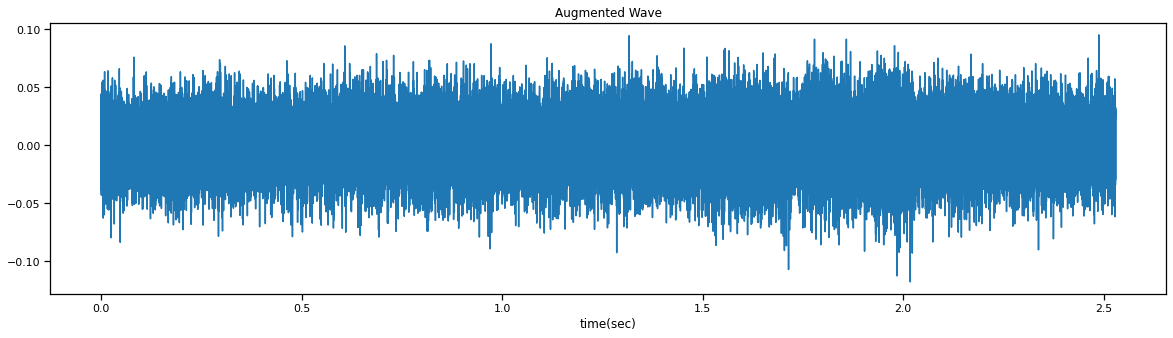

In [18]:
plt.figure(figsize=(20, 5))
x_aug = np.arange(0, len(augmented_data)) / sr
plt.plot(x_aug, augmented_data)
plt.xlabel("time(sec)")
plt.title("Augmented Wave")
plt.show()

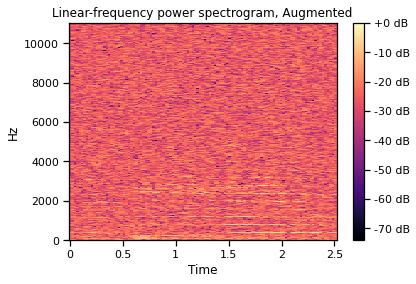

In [19]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(augmented_data)), ref=np.max)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
ax.set(title='Linear-frequency power spectrogram, Augmented')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB");

## Other augmentation methods
- AddGaussianNoise
- ApplyImpulseRespons
- AddShortNoises
- AirAbsorption
- TimeStretch
- SpecFrequencyMask

### AppyImpulseResponse

In [20]:
augment_impulse = Compose([
        ApplyImpulseResponse(ir_path=car_horn_file1,
                             p=1,
                             leave_length_unchanged=True)
])

In [21]:
# Apply Data Augmentation function
augmented_data_impulse = augment_impulse(samples=y, sample_rate=sr)

/Users/shige/.pyenv/versions/3.8.13/envs/us8kdata/lib/python3.8/site-packages/audiomentations/core/audio_loading_utils.py:34: UserWarning: /Users/shige/code/LeWagon_Project_Test/UrbanSound8k/audio/fold7/99812-1-6-0.wav had to be resampled from 44100 hz to 22050 hz. This hurt execution time.
  warnings.warn(


In [22]:
Audio(data=augmented_data_impulse, rate=sr)

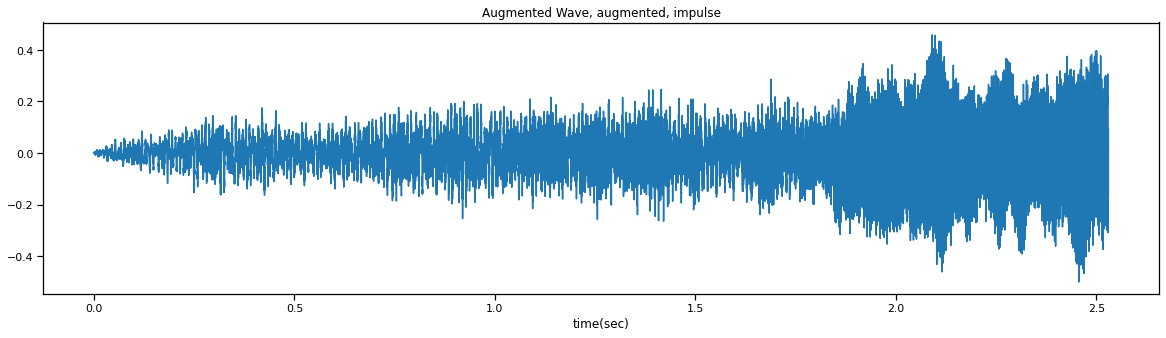

In [23]:
plt.figure(figsize=(20, 5))
x_aug_impulse = np.arange(0, len(augmented_data_impulse)) / sr
plt.plot(x_aug_impulse, augmented_data_impulse)
plt.xlabel("time(sec)")
plt.title("Augmented Wave, augmented, impulse")
plt.show()

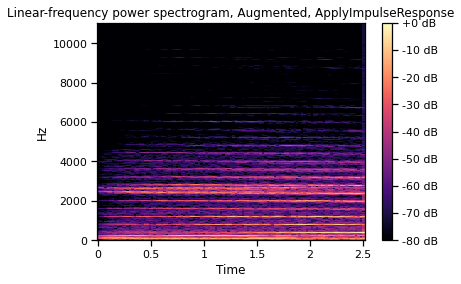

In [24]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(augmented_data_impulse)), ref=np.max)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
ax.set(title='Linear-frequency power spectrogram, Augmented, ApplyImpulseResponse')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB");

### AddShortNoises

In [25]:
augment_ShortNoises = Compose([
        AddShortNoises(sounds_path=car_horn_file1,
                       min_snr_in_db=0, max_snr_in_db=1,
                       noise_rms='relative',
                       burst_probability=0.8,
                       p=1)
])

In [26]:
# Apply Data Augmentation function
augmented_data_ShortNoises = augment_ShortNoises(samples=y, sample_rate=sr)

/Users/shige/.pyenv/versions/3.8.13/envs/us8kdata/lib/python3.8/site-packages/audiomentations/core/audio_loading_utils.py:34: UserWarning: /Users/shige/code/LeWagon_Project_Test/UrbanSound8k/audio/fold7/99812-1-6-0.wav had to be resampled from 44100 hz to 22050 hz. This hurt execution time.
  warnings.warn(
/Users/shige/.pyenv/versions/3.8.13/envs/us8kdata/lib/python3.8/site-packages/audiomentations/core/audio_loading_utils.py:34: UserWarning: /Users/shige/code/LeWagon_Project_Test/UrbanSound8k/audio/fold7/99812-1-6-0.wav had to be resampled from 44100 hz to 22050 hz. This hurt execution time.
  warnings.warn(
/Users/shige/.pyenv/versions/3.8.13/envs/us8kdata/lib/python3.8/site-packages/audiomentations/core/audio_loading_utils.py:34: UserWarning: /Users/shige/code/LeWagon_Project_Test/UrbanSound8k/audio/fold7/99812-1-6-0.wav had to be resampled from 44100 hz to 22050 hz. This hurt execution time.
  warnings.warn(
/Users/shige/.pyenv/versions/3.8.13/envs/us8kdata/lib/python3.8/site-pack

In [27]:
Audio(data=augmented_data_ShortNoises, rate=sr)

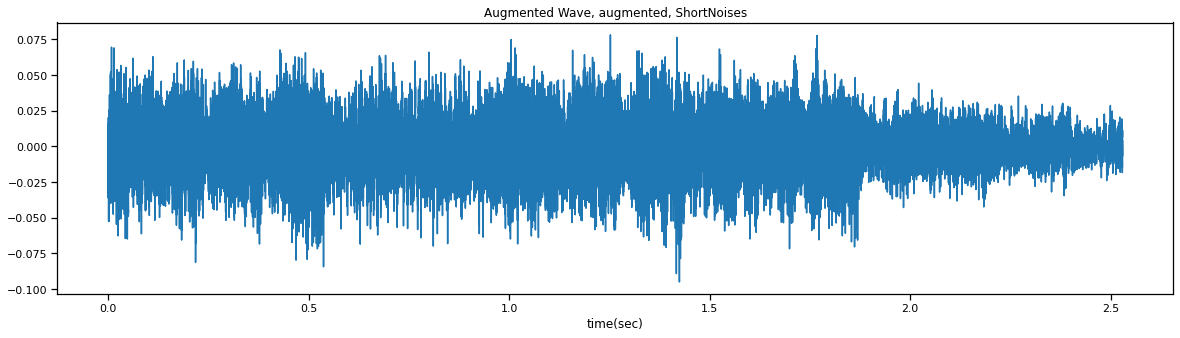

In [28]:
plt.figure(figsize=(20, 5))
x_aug_ShortNoises = np.arange(0, len(augmented_data_ShortNoises)) / sr
plt.plot(x_aug_ShortNoises, augmented_data_ShortNoises)
plt.xlabel("time(sec)")
plt.title("Augmented Wave, augmented, ShortNoises")
plt.show()

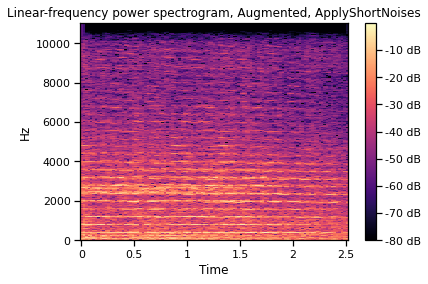

In [29]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(augmented_data_ShortNoises)), ref=np.max)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
ax.set(title='Linear-frequency power spectrogram, Augmented, ApplyShortNoises')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB");

### AirAbsorption

In [30]:
augment_AirAbsorption = Compose([
        AirAbsorption(min_temperature=20, max_temperature=20,
                      min_humidity=30, max_humidity=30,
                      min_distance=100, max_distance=100,
                      p=0.5)
])

In [31]:
# Apply Data Augmentation function
augmented_data_AirAbsorption = augment_AirAbsorption(samples=y, sample_rate=sr)

In [32]:
Audio(data=augmented_data_AirAbsorption, rate=sr)

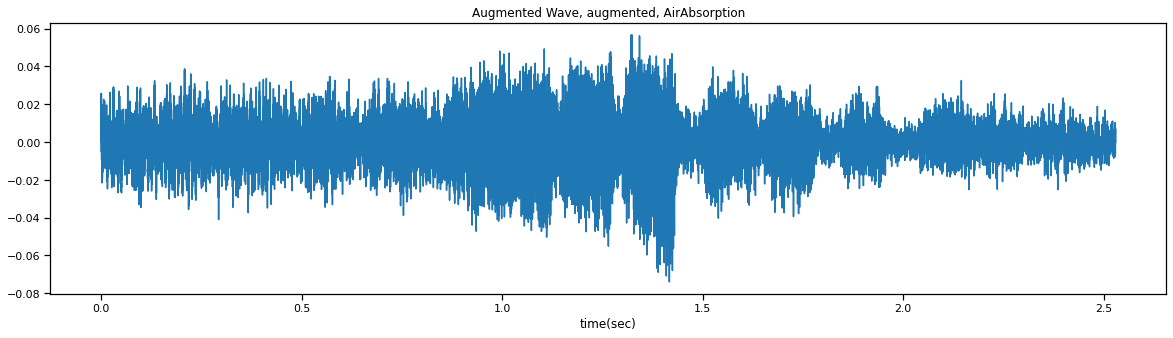

In [33]:
plt.figure(figsize=(20, 5))
x_aug_AirAborption = np.arange(0, len(augmented_data_AirAbsorption)) / sr
plt.plot(x_aug_ShortNoises, augmented_data_AirAbsorption)
plt.xlabel("time(sec)")
plt.title("Augmented Wave, augmented, AirAbsorption")
plt.show()

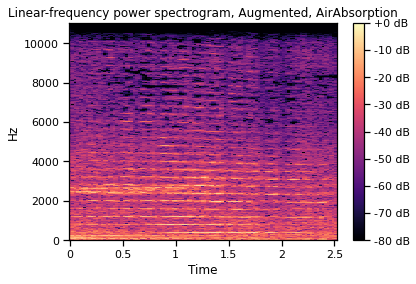

In [34]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(augmented_data_AirAbsorption)), ref=np.max)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
ax.set(title='Linear-frequency power spectrogram, Augmented, AirAbsorption')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB");

### TimeStretch

In [35]:
augment_TimeStretch = Compose([
        TimeStretch(min_rate=0.8,
                    max_rate=1.25,
                    leave_length_unchanged=True,
                    p=0.5)
])

In [36]:
# Apply Data Augmentation function
augmented_data_TimeStretch = augment_TimeStretch(samples=y, sample_rate=sr)

In [37]:
Audio(data=augmented_data_TimeStretch, rate=sr)

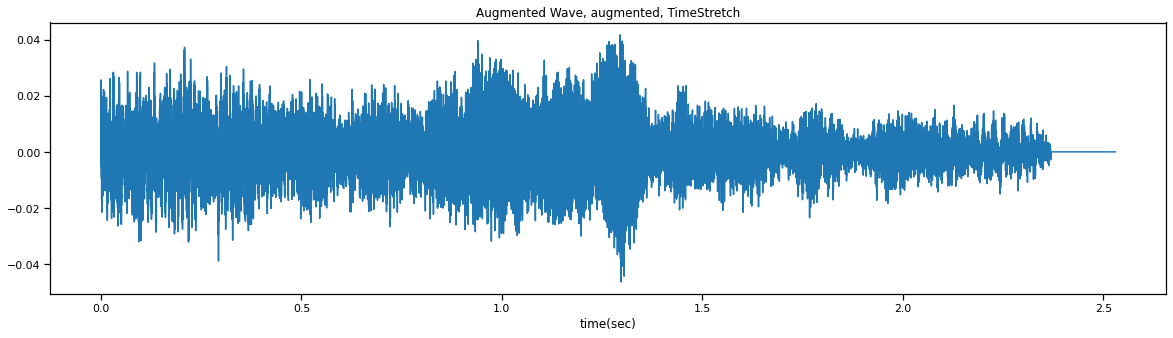

In [38]:
plt.figure(figsize=(20, 5))
x_aug_TimeStretch = np.arange(0, len(augmented_data_TimeStretch)) / sr
plt.plot(x_aug_ShortNoises, augmented_data_TimeStretch)
plt.xlabel("time(sec)")
plt.title("Augmented Wave, augmented, TimeStretch")
plt.show()

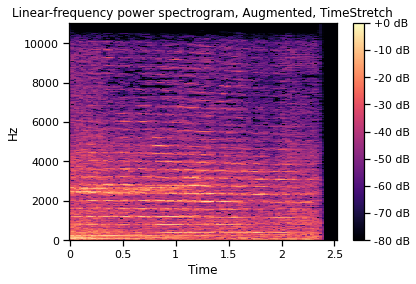

In [39]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(augmented_data_TimeStretch)), ref=np.max)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
ax.set(title='Linear-frequency power spectrogram, Augmented, TimeStretch')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB");

### SpecFrequencyMaskm

In [40]:
augment_TimeStretch = Compose([
        SpecFrequencyMask(min_mask_fraction=0.3,
                          max_mask_fraction=0.5,
                          fill_mode='constant',
                          fill_constant=0.0,
                          p=1)
])

In [41]:
# Apply Data Augmentation function
augmented_data_TimeStretch = augment_TimeStretch(samples=y, sample_rate=sr)

TypeError: __call__() takes 2 positional arguments but 3 were given